Gráfico salvo em: kmeans_plot.png


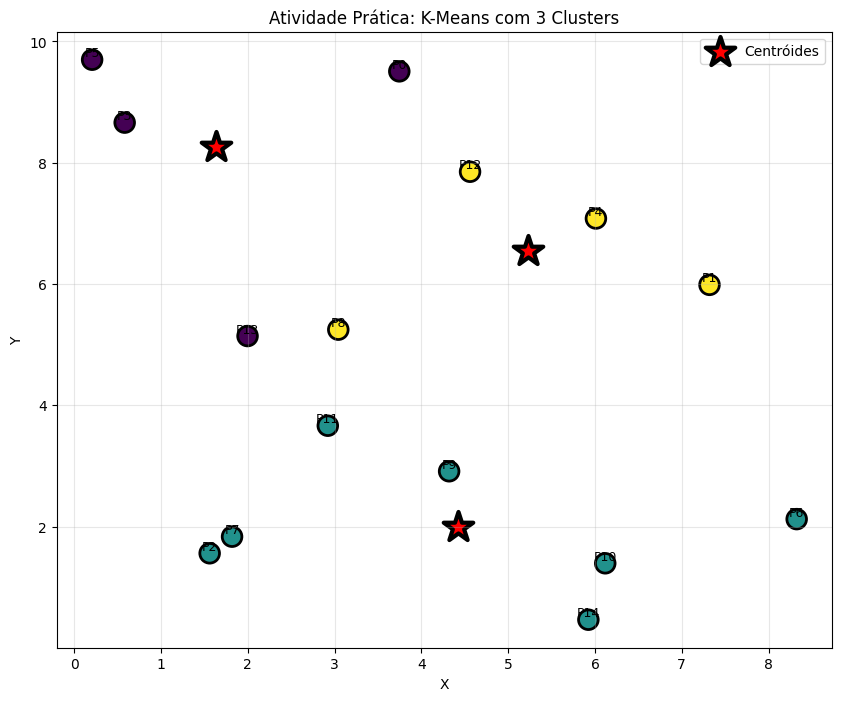


Verificação das distâncias (formato: [d0, d1, d2]):

P0: distâncias = ['2.4575', '7.5447', '3.3179'], 
    cluster atribuído = 0, menor distância -> 0 -> CORRETO
P1: distâncias = ['6.1225', '4.9313', '2.1590'], 
    cluster atribuído = 2, menor distância -> 2 -> CORRETO
P2: distâncias = ['6.6930', '2.8990', '6.1896'], 
    cluster atribuído = 1, menor distância -> 1 -> CORRETO
P3: distâncias = ['1.1282', '7.6980', '5.1130'], 
    cluster atribuído = 0, menor distância -> 0 -> CORRETO
P4: distâncias = ['4.5330', '5.3285', '0.9462'], 
    cluster atribuído = 2, menor distância -> 2 -> CORRETO
P5: distâncias = ['2.0315', '8.7861', '5.9369'], 
    cluster atribuído = 0, menor distância -> 0 -> CORRETO
P6: distâncias = ['9.0748', '3.9000', '5.3921'], 
    cluster atribuído = 1, menor distância -> 1 -> CORRETO
P7: distâncias = ['6.4212', '2.6132', '5.8160'], 
    cluster atribuído = 1, menor distância -> 1 -> CORRETO
P8: distâncias = ['3.3195', '3.5365', '2.5447'], 
    cluster atribuído = 

In [4]:
"""kmeans_pratico.py

Script pronto para execução — gera 15 pontos 2D, aplica K-Means (k=3), plota o resultado,
calcula manualmente distâncias entre cada ponto e os centróides e imprime verificação.

Como usar:
- No Google Colab: cole todo o conteúdo deste arquivo numa célula e execute.
- Localmente: salve como kmeans_pratico.py e rode: python kmeans_pratico.py

Requisitos:
- numpy
- matplotlib
- scikit-learn

Instalação (se necessário):
    pip install numpy matplotlib scikit-learn

O script também imprime a regra lógica aplicada.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def gerar_dados(seed: int = 42, n_points: int = 15) -> np.ndarray:
    """Gera n_points pontos 2D aleatórios no intervalo [0, 10)."""
    np.random.seed(seed)
    return np.random.rand(n_points, 2) * 10


def aplicar_kmeans(X: np.ndarray, n_clusters: int = 3, random_state: int = 42):
    """Aplica K-Means e retorna labels e centróides."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    return labels, centroids


def visualizar(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray, savefig: str | None = None):
    """Plota os pontos coloridos por cluster e destaca os centróides.

    Se savefig for uma string, o gráfico também será salvo nesse caminho.
    """
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=200,
                cmap='viridis', edgecolors='black', linewidths=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='red', s=500, marker='*',
                edgecolors='black', linewidths=3, label='Centróides')

    # Adicionar rótulos nos pontos
    for i, (x, y) in enumerate(X):
        plt.annotate(f'P{i}', (x, y), fontsize=9, ha='center', va='bottom')

    plt.title("Atividade Prática: K-Means com 3 Clusters")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True, alpha=0.3)

    if savefig:
        plt.savefig(savefig, dpi=150, bbox_inches='tight')
        print(f"Gráfico salvo em: {savefig}")

    plt.show()


def verificar_distancias(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> None:
    """Calcula e imprime as distâncias do ponto a cada centróide e verifica a atribuição."""
    print("\nVerificação das distâncias (formato: [d0, d1, d2]):\n")
    for i, point in enumerate(X):
        distances = [np.linalg.norm(point - c) for c in centroids]
        assigned = labels[i]
        argmin = int(np.argmin(distances))
        ok = assigned == argmin
        print(f"P{i}: distâncias = {[f'{d:.4f}' for d in distances]}, ")
        print(f"    cluster atribuído = {assigned}, menor distância -> {argmin} -> {'CORRETO' if ok else 'INCORRETO'}")


def regra_logica_texto() -> str:
    """Retorna a regra lógica aplicada pelo K-Means em formato textual e matemático."""
    texto = (
        "Regra lógica aplicada:\n"
        "Cada ponto x_i é atribuído ao cluster j cujo centróide c_j é o mais próximo.\n"
        "Formalmente:\n"
        "    Se d(x_i, c_j) = min_{k in {1,2,3}} d(x_i, c_k) ⇒ x_i pertence ao cluster j\n"
        "Onde d(x, c) é a distância euclidiana entre x e c."
    )
    return texto


def main():
    # 1. Gerar dados
    X = gerar_dados(seed=42, n_points=15)

    # 2. Aplicar K-Means
    labels, centroids = aplicar_kmeans(X, n_clusters=3, random_state=42)

    # 3. Visualizar (o gráfico também pode ser salvo)
    visualizar(X, labels, centroids, savefig='kmeans_plot.png')

    # 4. Verificar distâncias manualmente
    verificar_distancias(X, labels, centroids)

    # 5. Documentar a regra lógica
    print("\n" + regra_logica_texto())


if __name__ == '__main__':
    main()
